Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [3]:
customer_df.info
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [5]:
cols = []
for column in customer_df.columns:
    cols.append(column.lower())
cols
customer_df.columns = cols
customer_df.head(2)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [6]:
customer_df.columns = customer_df.columns.str.replace(" ", "_")

In [7]:
customer_df.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


Change effective to date column to datetime format.

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df.effective_to_date)

C:\Users\tella\AppData\Local\Temp\ipykernel_25908\2802521434.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df.effective_to_date)


In [9]:
customer_df.head(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [10]:
numerical_df = customer_df.select_dtypes(np.number)

In [11]:
numerical_df.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [12]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [13]:
numerical_df.shape

(9134, 8)

In [14]:
numerical_df.monthly_premium_auto.nunique()/len(numerical_df)

0.022115174074885044

In [15]:
numerical_df.nunique()/len(numerical_df)

customer_lifetime_value          0.880337
income                           0.623385
monthly_premium_auto             0.022115
months_since_last_claim          0.003941
months_since_policy_inception    0.010948
number_of_open_complaints        0.000657
number_of_policies               0.000985
total_claim_amount               0.559010
dtype: float64

In [16]:
numerical_df.monthly_premium_auto.mean()

93.21929056273265

In [17]:
numerical_df.monthly_premium_auto.min()

61

In [18]:
numerical_df.monthly_premium_auto.max()

298

In [19]:
def separate_numerical_columns(df):
    # Calculate the ratio of unique values to the total number of rows
    unique_ratio = df.nunique() / len(df)
    
    # Filter columns based on the condition
    continuous_columns = unique_ratio[unique_ratio > 0.05].index
    discrete_columns = unique_ratio[unique_ratio <= 0.05].index
    
    # Create new dataframes for discrete and continuous columns
    continuous_df = df[continuous_columns]
    discrete_df = df[discrete_columns]
    
    return continuous_df, discrete_df

continuous_df, discrete_df = separate_numerical_columns(numerical_df)

In [20]:
continuous_df, discrete_df = separate_numerical_columns(numerical_df)

In [21]:
continuous_df.head(5)

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [22]:
discrete_df.head(5)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


Plot a correlation matrix, comment what you see.

<Axes: >

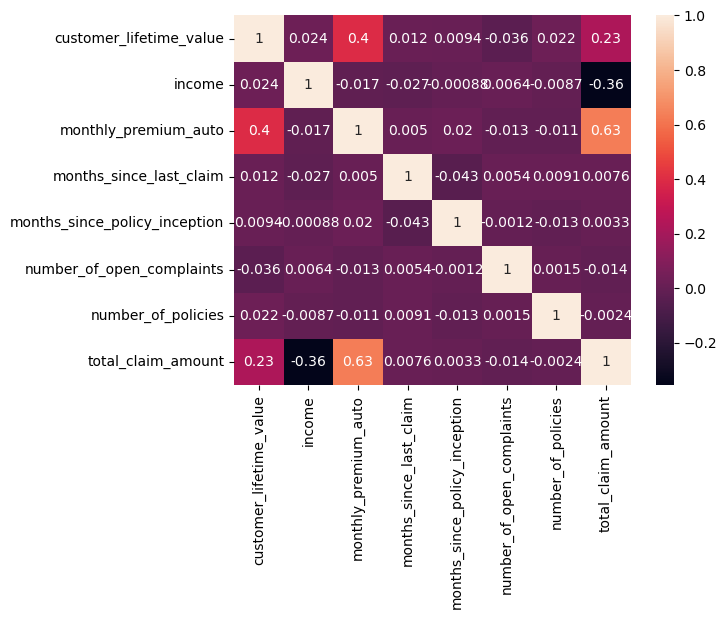

In [23]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix,annot=True)

In [24]:
# the total claim is correlated to customer lifetim value, the income and the monthly premium auto
# those 3 columns impacts the most the target column total claim amount

# in addition the monthly premium auto is also correlated to customer lifetime value

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

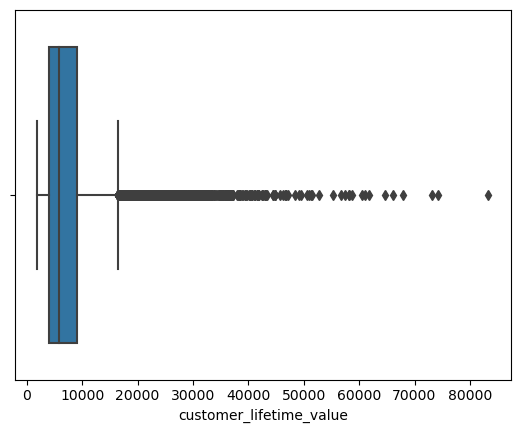

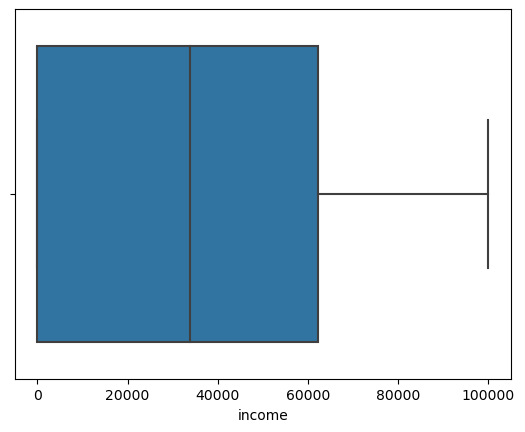

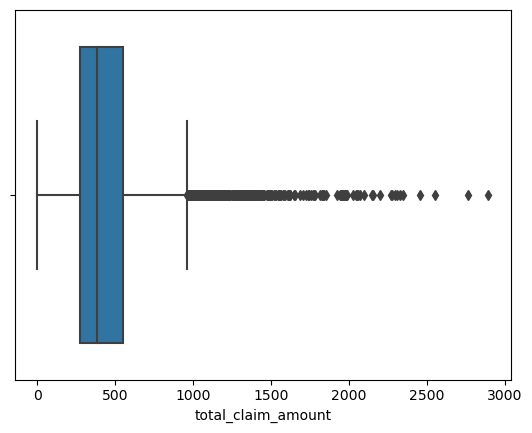

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


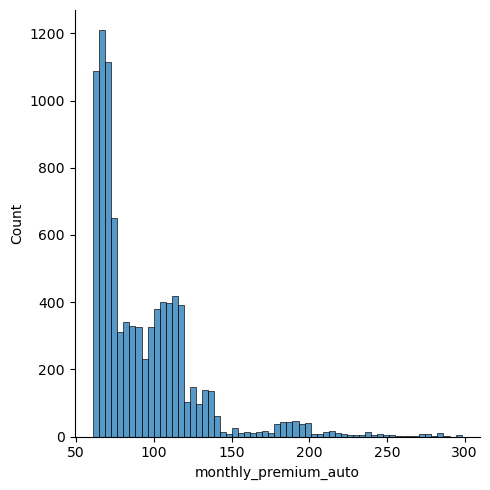

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


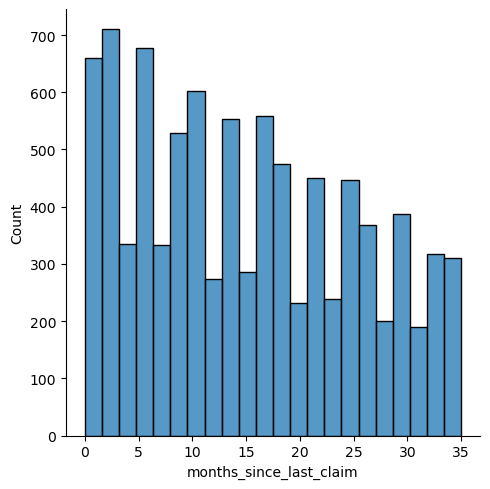

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


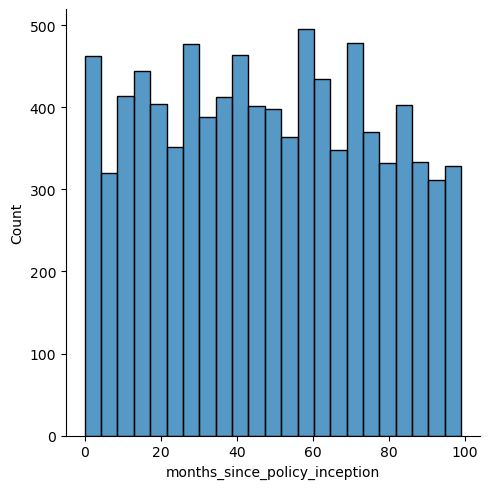

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


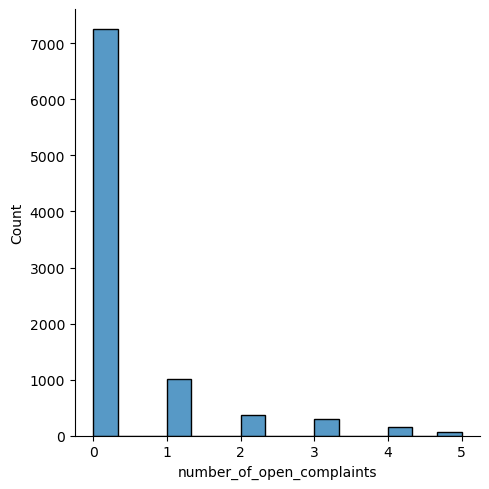

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


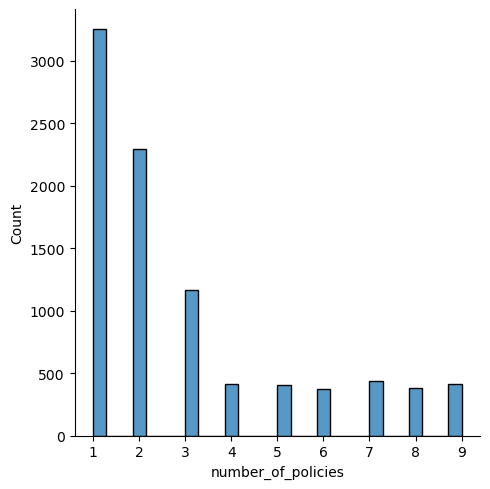

In [25]:
def plots(df):
    
    for column in continuous_df.columns:
        sns.boxplot(x=column, data=continuous_df)
        plt.show()
    for column in discrete_df.columns:
        sns.displot(x=column, data=discrete_df)
        plt.show()
    
plots(numerical_df)

Comment what you can see in the plots.

In [26]:
#I will check the outliers of monthly_premium auto // total_claim_amount // customer_lifetime_value
#The other columns seem to be OK without outliers.
# Dopple check for the income column 

C:\Users\tella\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


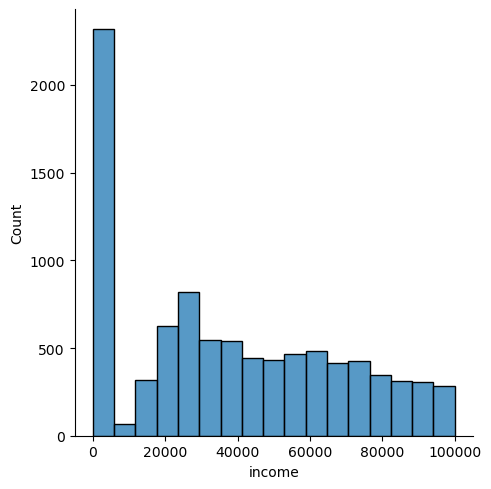

In [27]:
sns.displot(numerical_df['income'])

In [28]:
numerical_df.income.describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [29]:
numerical_df.income.mode()

0    0
Name: income, dtype: int64

In [30]:
numerical_df.loc[numerical_df['income'] == numerical_df['income'].min() ]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,6979.535903,0,94,13,42,0,8,1131.464935
3,7645.861827,0,106,18,65,0,7,529.881344
7,7216.100311,0,101,0,68,0,4,363.029680
10,4738.992022,0,67,23,5,0,3,482.400000
11,8197.197078,0,110,27,87,0,3,528.000000
...,...,...,...,...,...,...,...,...
9123,5678.050167,0,76,8,44,0,3,364.800000
9125,19872.262000,0,185,26,35,0,2,1950.725547
9126,4628.995325,0,67,25,21,0,4,482.400000
9131,8163.890428,0,85,9,37,3,2,790.784983


In [31]:
# We filled the 0 with the neighbors classifier method

In [32]:
numericals_with_income = numerical_df[numerical_df['income']>0]
numericals_with_income.shape

(6817, 8)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

X_income=numericals_with_income.drop(['income', 'total_claim_amount'], axis=1)
y_income=numericals_with_income['income']

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
X_normalized_income = pd.DataFrame(MinMaxScaler().fit_transform(X_income), columns=X_income.columns)
X_normalized_income

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.007926,0.033898,0.914286,0.050505,0.0,0.000
1,0.132596,0.199153,0.514286,0.383838,0.0,0.125
2,0.008544,0.050847,0.342857,0.444444,0.0,0.000
3,0.075566,0.033898,0.400000,0.949495,0.0,0.125
4,0.040157,0.025424,0.000000,0.131313,0.0,1.000
...,...,...,...,...,...,...
6812,0.035863,0.012712,0.171429,0.484848,0.0,0.250
6813,0.024389,0.182203,0.457143,0.585859,0.0,0.000
6814,0.262126,0.050847,0.514286,0.898990,0.0,0.125
6815,0.012026,0.076271,0.400000,0.282828,0.0,0.000


In [36]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized_income,y_income)
KNN.score(X_normalized_income,y_income)

0.4330350594102978

In [37]:
# The score is not too good,
#so I kept the column income with the 0 and decide later if I filled with the mean of if I keep the predicted income

In [38]:
X_all = numerical_df.drop(['income','total_claim_amount'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = numerical_df['income']

In [39]:
predicted_income = pd.Series(KNN.predict(X_normalized_all),name='predicted_income')

In [40]:
df_with_income = pd.concat([numerical_df['income'],predicted_income],axis=1)

In [41]:
df_with_income.head(20)

,income,predicted_income
0,56274,31385
1,0,32818
2,48767,11885
3,0,27804
4,43836,25860
5,62902,62902
6,55350,55350
7,0,24450
8,14072,14072
9,28812,28095


In [42]:
numerical_df=pd.concat([numerical_df,predicted_income],axis=1)

In [43]:
numerical_df['final_income'] =  np.where(numerical_df['income']==0, numerical_df['predicted_income'], numerical_df['income'])

In [44]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,predicted_income,final_income
0,2763.519279,56274,69,32,5,0,1,384.811147,31385,56274
1,6979.535903,0,94,13,42,0,8,1131.464935,32818,32818
2,12887.431650,48767,108,18,38,0,2,566.472247,11885,48767
3,7645.861827,0,106,18,65,0,7,529.881344,27804,27804
4,2813.692575,43836,73,12,44,0,1,138.130879,25860,43836
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,26410,71941
9130,3096.511217,21604,79,14,28,0,1,379.200000,21604,21604
9131,8163.890428,0,85,9,37,3,2,790.784983,38595,38595
9132,7524.442436,21941,96,34,3,0,3,691.200000,21941,21941


Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [45]:
outliers_df=numerical_df[['monthly_premium_auto', 'total_claim_amount', 'customer_lifetime_value']]

In [46]:
outliers_df.describe()

,monthly_premium_auto,total_claim_amount,customer_lifetime_value
count,9134.000000,9134.000000,9134.000000
mean,93.219291,434.088794,8004.940475
std,34.407967,290.500092,6870.967608
min,61.000000,0.099007,1898.007675
25%,68.000000,272.258244,3994.251794
50%,83.000000,383.945434,5780.182197
75%,109.000000,547.514839,8962.167041
max,298.000000,2893.239678,83325.381190


In [47]:
# the standard deviation is big for customer_lifetime_value. The value between 75% percentil and max is multiplied by 10.
# Let's have a deeper view on this column before deciding if we keep the outliers or not

In [48]:
clt_labels = ['Very Low','Low', 'Moderate', 'High', 'Very High']
numerical_df['clt_categories'] = pd.cut(numerical_df['customer_lifetime_value'],5,labels=clt_labels)

In [50]:
numerical_df['clt_categories'].value_counts()

clt_categories
Very Low     8453
Low           567
Moderate       95
High           15
Very High       4
Name: count, dtype: int64

In [51]:
numerical_df.loc[numerical_df['clt_categories'] == numerical_df['clt_categories'].max()]

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,predicted_income,final_income,clt_categories
1974,74228.51604,0,242,1,34,0,2,1742.400000,39547,39547,Very High
5716,83325.38119,58958,231,31,74,0,2,1108.800000,29295,58958,Very High
6252,73225.95652,39547,202,11,21,0,2,969.600000,39547,39547,Very High
7283,67907.27050,78310,192,34,18,1,2,151.711475,22022,78310,Very High


In [52]:
# there are only 4 rows of 'Very high' outliers, with very different values in total_claim_amount, our value.
# We can remove them for our model.
# I'll keep them in our end-file and decide later.

Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [53]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
predicted_income                 0
final_income                     0
clt_categories                   0
dtype: int64

In [54]:
#no NaN values

Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [55]:
numerical_df.to_csv(r"C:\Users\tella\IH-Labs\lab-cleaning-numerical-data\numerical_df.csv", index=False)

Find all of the categorical data. Save it in a categorical_df variable.

In [104]:
categorical_df = customer_df.select_dtypes('object')

In [105]:
categorical_df.head(5)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


Check for NaN values and decide what to do with them, do it now.

In [106]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [107]:
#there are no NaN values

Check all unique values of columns.

In [108]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [109]:
# customer is actually a customer_ID

In [110]:
categorical_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

In [111]:
categorical_df['policy'].value_counts()

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

In [112]:
# Create just 3 categories like Personal, Corporate, Special

In [113]:
categorical_df['state'].value_counts()

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

In [114]:
categorical_df['employmentstatus'].value_counts()

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

In [115]:
categorical_df['education'].value_counts()

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

Check dtypes. Do they all make sense as categorical data?

In [116]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [117]:
# Yes they are all objects
# A numerical type can seem seen as a categorical but not the otherway around

Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [118]:
categorical_df.head(5)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [119]:
# The customer column has alpha and numerical values.
# We can drop the column as it is not usefull for our model

Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [120]:
# Yes I want to change the column vehicle_class and put Luxury SUV, Luxury Cars and Sports cars into one category Luxury

In [121]:
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].replace({'Sports Car':'Luxury', 'Luxury SUV':'Luxury', 'Luxury Car':'Luxury'})

In [122]:
categorical_df['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: count, dtype: int64

In [123]:
#drop the customer column because it is an ID

In [124]:
categorical_df = categorical_df.drop(['customer'], axis=1)

Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [125]:
categorical_df.pivot_table(index=['policy'], values = ['policy_type'],aggfunc = {'policy_type':'count'}).reset_index()

,policy,policy_type
0,Corporate L1,359
1,Corporate L2,595
2,Corporate L3,1014
3,Personal L1,1240
4,Personal L2,2122
5,Personal L3,3426
6,Special L1,66
7,Special L2,164
8,Special L3,148


In [126]:
categorical_df.pivot_table(index=['policy_type', 'policy'], values = ['gender'],aggfunc = {'gender':'count'}).reset_index()

,policy_type,policy,gender
0,Corporate Auto,Corporate L1,359
1,Corporate Auto,Corporate L2,595
2,Corporate Auto,Corporate L3,1014
3,Personal Auto,Personal L1,1240
4,Personal Auto,Personal L2,2122
5,Personal Auto,Personal L3,3426
6,Special Auto,Special L1,66
7,Special Auto,Special L2,164
8,Special Auto,Special L3,148


In [127]:
# we can see here that the policy_type and the policy values are corrolated.
# I decide to drop the column policy because it has more different categories

In [128]:
categorical_df = categorical_df.drop(['policy'], axis=1)

Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [129]:
categorical_df.nunique()

state               5
response            2
coverage            3
education           5
employmentstatus    5
gender              2
location_code       3
marital_status      3
policy_type         3
renew_offer_type    4
sales_channel       4
vehicle_class       4
vehicle_size        3
dtype: int64

In [130]:
# state, response, gender, vehicle_class, policy_type aldready checked and OK

In [131]:
categorical_df['coverage'].value_counts()

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

In [132]:
categorical_df['location_code'].value_counts()

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

In [133]:
categorical_df['marital_status'].value_counts()

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

In [134]:
categorical_df['vehicle_size'].value_counts()

vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

In [135]:
#OK we can keep the 3 categories

In [136]:
categorical_df['education'].value_counts()

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

In [137]:
# As I am not sure what College is, I would let it as it is.

In [138]:
categorical_df['renew_offer_type'].value_counts()

renew_offer_type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

In [139]:
# we cannot do much with this info

In [140]:
categorical_df['sales_channel'].value_counts()

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

In [141]:
categorical_df['employmentstatus'].value_counts()   

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

In [142]:
# Here I decide to create 'other status' that groups the 3 lowest values

In [143]:
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].replace({'Medical Leave':'Other status', 'Disabled':'Other status', 'Retired':'Other status'})

In [144]:
categorical_df['employmentstatus'].value_counts()   

employmentstatus
Employed        5698
Unemployed      2317
Other status    1119
Name: count, dtype: int64

Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [145]:
categorical_df.to_csv(r"C:\Users\tella\IH-Labs\lab-cleaning-numerical-data\categorical_df.csv", index=False)

Open the categorical dataframe we created before.

Plot all the categorical variables with the proper plot. What can you see?

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Make any changes you feel are necessary.

Plot time variable. Can you extract something from it?

The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [146]:
categorical_df.head(5)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


Plot all the categorical variables with the proper plot. What can you see?

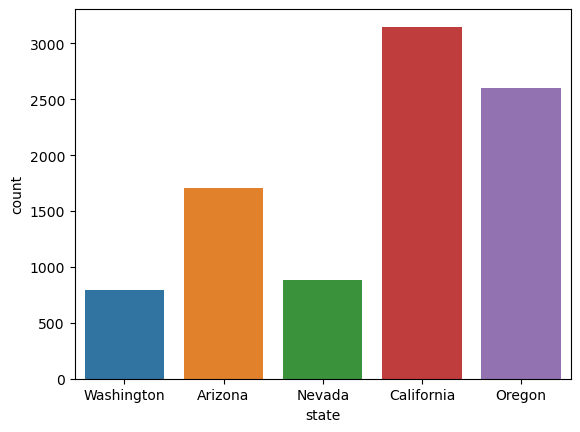

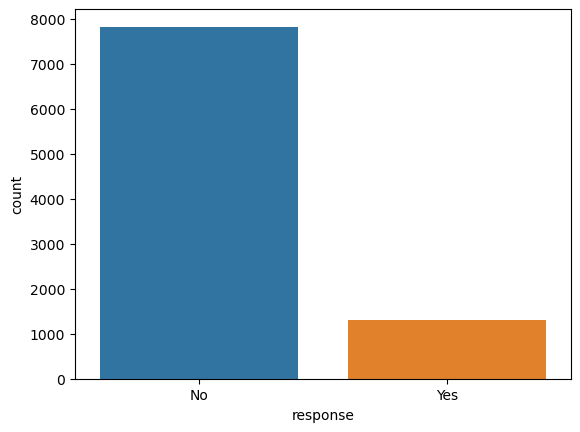

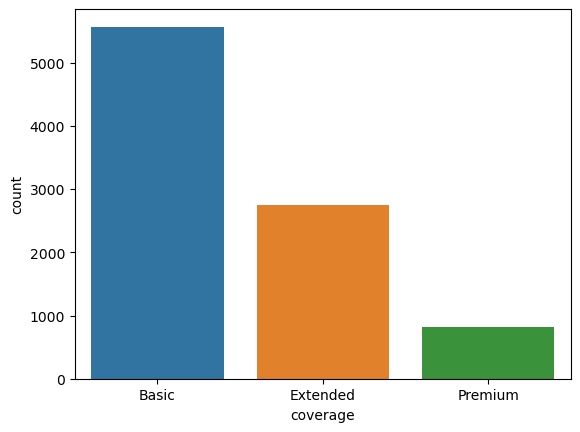

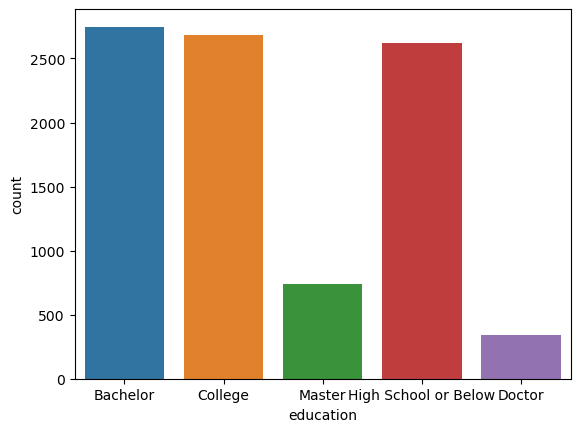

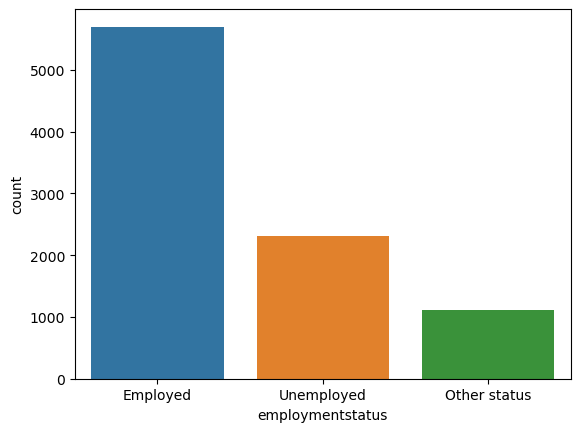

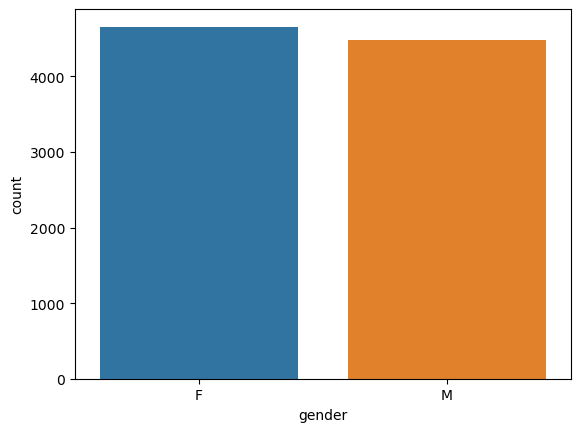

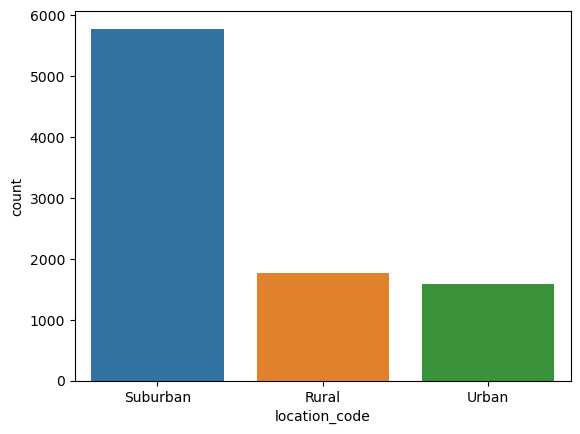

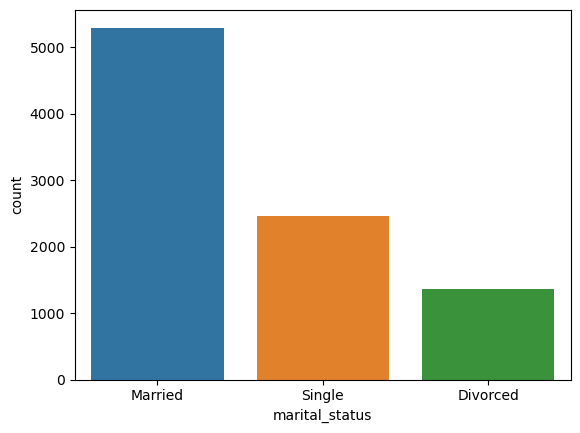

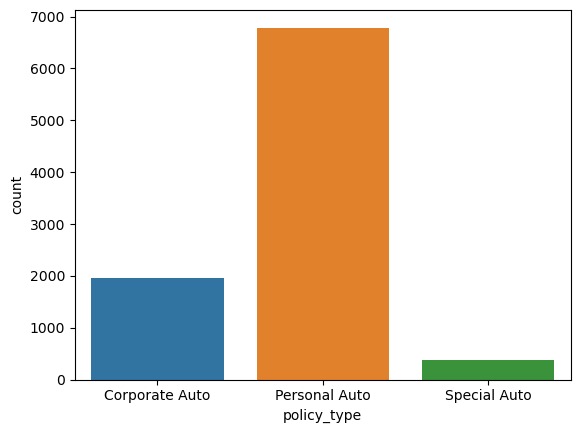

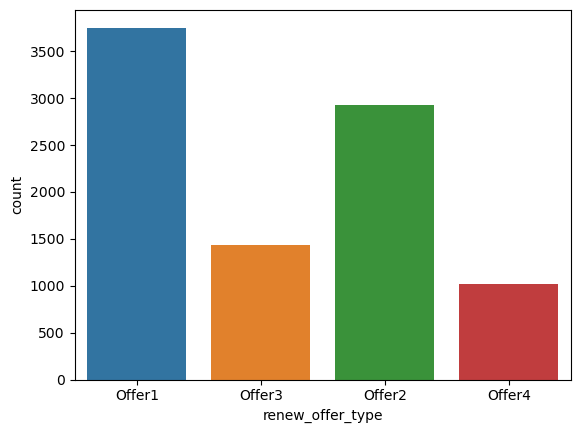

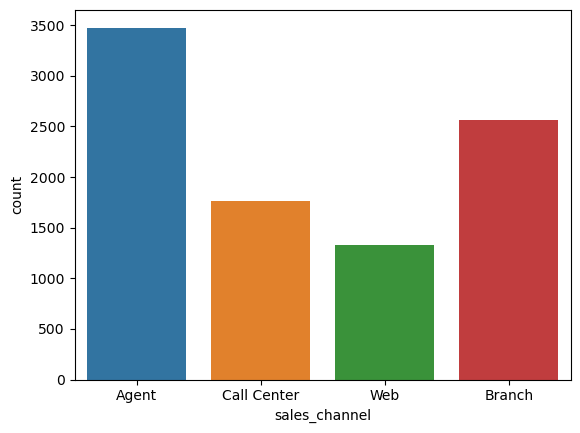

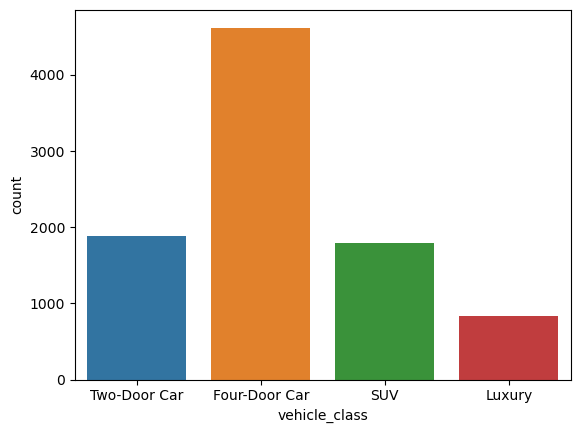

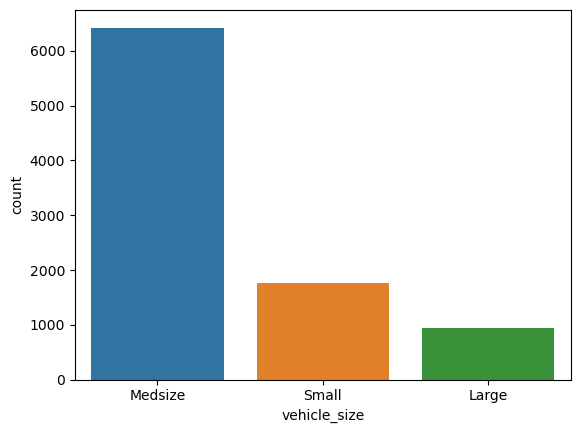

In [147]:
def cat_plots(df):
    for column in categorical_df.columns:
        sns.countplot(x=column, data=categorical_df)
        plt.show()
    
cat_plots(categorical_df)

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [148]:
# Yes some columns were redundant, I already cleaned them in the previous lab, like the policy_type and policy

Make any changes you feel are necessary.

In [103]:
categorical_df['education'].value_counts()

education
Other status            2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

In [ ]:
# I feel quite confident with the changment I did yestetday with the column:

# group "other status" in the employment column
# group cars into Luxury in the vehicle_class column
# drop customer, policy

Plot time variable. Can you extract something from it?

In [149]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [152]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [153]:
effective_to_date = customer_df['effective_to_date']

In [154]:
effective_to_date
# It is the date when the insurance starts

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

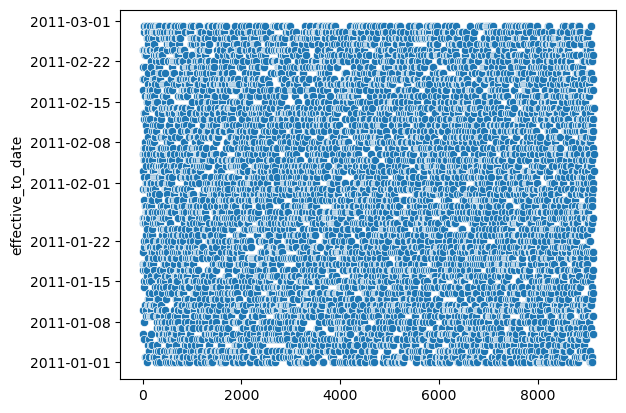

In [157]:
sns.scatterplot(data=effective_to_date)
plt.show()

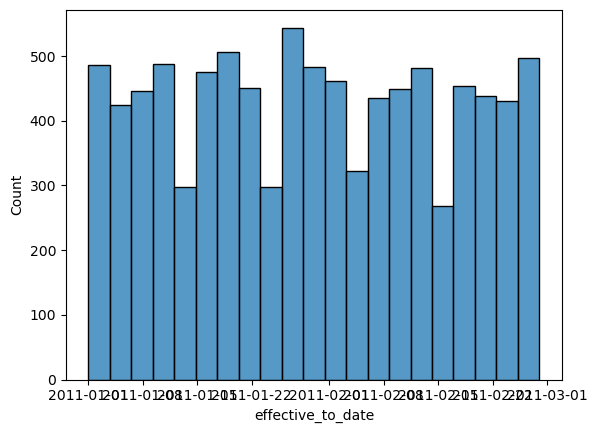

In [159]:
sns.histplot(data=effective_to_date)
plt.show()

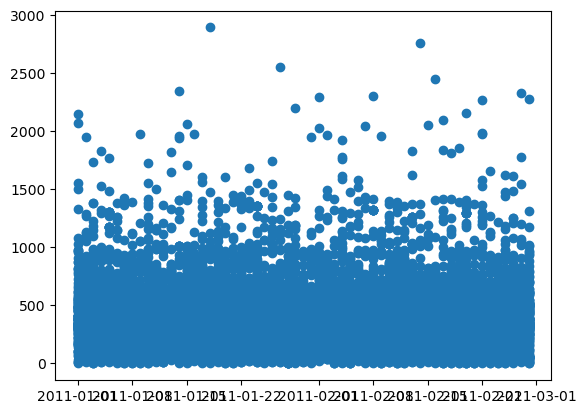

In [171]:
plt.plot_date(effective_to_date, y=customer_df['total_claim_amount'])

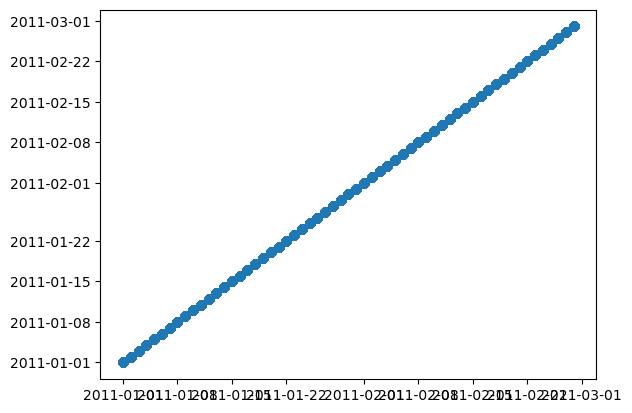

In [175]:
plt.plot_date(effective_to_date, y=effective_to_date)

In [ ]:
# We cannot extract much information just with the 

In [165]:
duplicate_rows = customer_df['customer'].duplicated()
duplicate_rows.sum()

0

In [ ]:
# I checked if there were duplicated customer to know if the changment of a date creates an additional row for the same customer
# Answer is NO

In [166]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [ ]:
#create a week day column to see if there is a path

In [176]:
customer_df['weekdays'] = customer_df['effective_to_date'].dt.day_name()
#customer_df['month'] = '

In [177]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,weekdays
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Thursday
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Monday
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Saturday
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Thursday
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,Thursday
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,Saturday
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Sunday
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,Thursday


In [180]:
customer_df['month'] = customer_df['effective_to_date'].dt.month

In [181]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,weekdays,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Thursday,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Monday,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Saturday,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Thursday,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Thursday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,Thursday,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,Saturday,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Sunday,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,Thursday,2


<Axes: xlabel='weekdays', ylabel='count'>

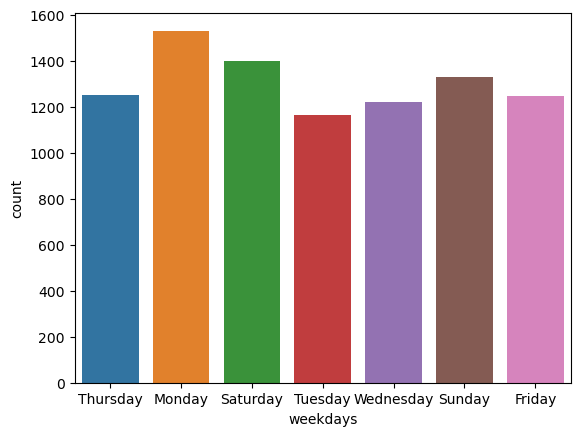

In [192]:
sns.countplot(x=customer_df['weekdays'])

<Axes: xlabel='month', ylabel='count'>

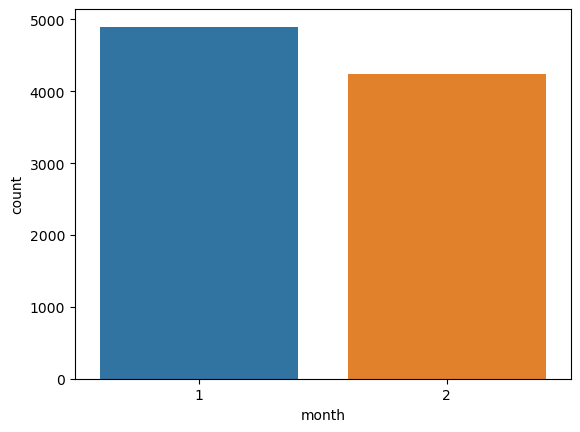

In [193]:
sns.countplot(x=customer_df['month'])

In [ ]:
# The information we can see is that Monday is the most use day to start the contract
# January is the month where most contracts started.

In [ ]:
# Next step should concatenate numerical + categorical + effective to date + weekdays + month